## Make all the little people dance
### Or, how to generate 360 degrees of dude

1. make a generator for one, use np to get a random direction, use fixed size, draw nose
2. Make a save util, and a directory for these lil boys
3. Figure out a name, don't keep saying lil boys or you'll have to explain to HR


In [35]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

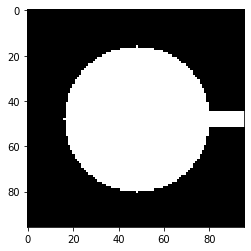

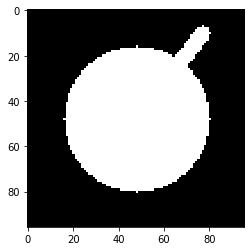

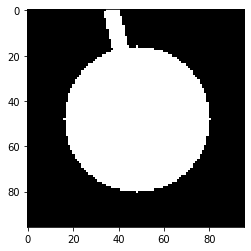

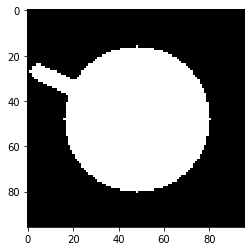

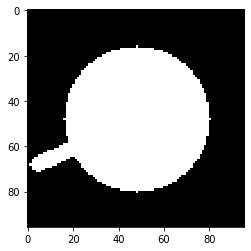

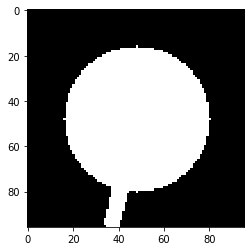

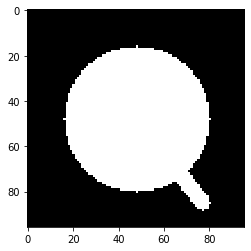

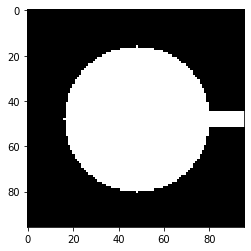

In [37]:
def draw_dude(angle):
    im = np.zeros((96, 96, 3))
    size = 32
    col = (255, 255, 255)
    p1 = (48, 48)
    p2 = (int(p1[0]+(size*1.5)*np.cos(angle)), int(p1[1]-(size*1.5)*np.sin(angle)))

    cv2.circle(im, p1, size, thickness=-1, color=col, lineType=cv2.LINE_AA)
    cv2.line(im, p1, p2, thickness=int(np.sqrt(size)), color=col, lineType=cv2.LINE_AA)
    
    return im.astype('uint8')

for a in np.linspace(0, np.pi*2, 8):
    im = draw_dude(a)
    plt.imshow(im)
    plt.show()

In [40]:
save_dir = 'all_angles'

aspace = np.linspace(0, 359, 360)
# print(len(aspace))
for a in aspace:
    rad = a*np.pi/180
    noise = np.random.randn(1)*0.0001
    im = draw_dude(rad+noise)

    pchang = noise/(rad+noise)*100
    #print(a, round(rad, 4), round(pchang[0], 4) )
    fn = os.path.join(save_dir, str(int(a))+'.jpg')
    im = Image.fromarray(im)
    # print(fn)
    im.save(fn)